In [1]:
from torchgeo.datasets import SpaceNet1

ModuleNotFoundError: No module named 'torchgeo'

In [2]:
ds = SpaceNet1(download=True, image='8band')

sn1_AOI_1_RIO not found


ImportError: radiant_mlhub is not installed and is required to download this collection

In [62]:
ds[2]['image'].shape, ds[2]['image'].dtype, len(ds)

(torch.Size([8, 102, 110]), torch.float32, 6940)

In [59]:
test_ds = SpaceNet1(download=True, image='8band', split='test')
test_ds[0]['image']

tensor([[[ 570.,  533.,  525.,  ...,  659.,  659.,  745.],
         [ 488.,  405.,  488.,  ...,  576.,  567.,  520.],
         [ 459.,  342.,  450.,  ...,  559.,  567.,  557.],
         ...,
         [ 442.,  413.,  246.,  ...,  270.,  214.,  213.],
         [ 204.,  375.,  387.,  ...,  243.,  319.,  178.],
         [ 285.,  273.,  358.,  ...,  323.,  187.,  225.]],

        [[ 562.,  456.,  358.,  ...,  888.,  830.,  703.],
         [ 472.,  463.,  524.,  ...,  543.,  630.,  637.],
         [ 410.,  417.,  455.,  ...,  713.,  606.,  532.],
         ...,
         [ 535.,  479.,  188.,  ...,  255.,  201.,  164.],
         [ 347.,  455.,  409.,  ...,  218.,  105.,  229.],
         [ 225.,  347.,  525.,  ...,  204.,  178.,  229.]],

        [[ 800.,  694.,  674.,  ..., 1041., 1005.,  975.],
         [ 704.,  634.,  539.,  ...,  727.,  763.,  836.],
         [ 609.,  604.,  678.,  ...,  825.,  736.,  695.],
         ...,
         [1028.,  837.,  350.,  ...,  464.,  426.,  358.],
         [

In [35]:
import numpy as np

for i in range(0, len(ds), 1000):
    print(np.array(ds[i]['image']).shape, ds[i]['image'].dtype, ds[i]['mask'].shape, ds[i]['mask'].dtype)

(8, 102, 110) torch.float32 torch.Size([102, 110]) torch.int64
(8, 102, 110) torch.float32 torch.Size([102, 110]) torch.int64
(8, 102, 110) torch.float32 torch.Size([102, 110]) torch.int64
(8, 102, 110) torch.float32 torch.Size([102, 110]) torch.int64
(8, 102, 110) torch.float32 torch.Size([102, 110]) torch.int64
(8, 102, 110) torch.float32 torch.Size([102, 110]) torch.int64
(8, 102, 110) torch.float32 torch.Size([102, 110]) torch.int64


In [74]:
import tensorflow_datasets as tfds
from torchgeo.datasets import SpaceNet1 as TorchGeoSpacNet1
import numpy as np

np.random.seed(42)

class Spacenet1(tfds.core.GeneratorBasedBuilder):
    VERSION = tfds.core.Version('0.0.2')

    def _info(self):
        return tfds.core.DatasetInfo(
            builder=self,
            features=tfds.features.FeaturesDict({
                'image': tfds.features.Tensor(
                    shape=(8, 102, 110), 
                    dtype=np.dtype("float32"),
                    encoding="zlib"
                ),
                'label': tfds.features.Tensor(
                    shape=(102, 110), 
                    dtype=np.dtype("int16"),
                    encoding="zlib"
                ),
                'id': tfds.features.Text(),
            }),
        )

    def _split_generators(self, dl_manager):
        torch_ds = TorchGeoSpacNet1(download=True, image='8band', split='train')
        indices = np.arange(len(torch_ds))

        split_index = int(0.8 * len(indices))
        train_indices = indices[:split_index]
        val_indices = indices[split_index:]

        return {
            'train': self._generate_examples(torch_ds, train_indices),
            'val': self._generate_examples(torch_ds, val_indices),
        }

    def _generate_examples(self, torch_ds, indices):
        for i in indices:
            sample = torch_ds[i]
            ret_dict = dict()
            ret_dict['image'] = np.array(sample['image'], dtype=np.dtype("float32"))
            ret_dict['label'] = np.array(sample['mask'], dtype=np.dtype("int16"))
            ret_dict['id'] = f'id-{i}'

            yield ret_dict['id'], ret_dict

In [75]:
builder = Spacenet1()
builder.download_and_prepare(file_format='array_record')
ds = builder.as_dataset(split='train')

0.0.1
Using default data dir /home/user/tensorflow_datasets/spacenet1/0.0.2 instead.


Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /home/user/tensorflow_datasets/spacenet1/incomplete.W1PQHG_0.0.2/spacenet1-train.array_record*...:  …

Generating val examples...: 0 examples [00:00, ? examples/s]

Shuffling /home/user/tensorflow_datasets/spacenet1/incomplete.W1PQHG_0.0.2/spacenet1-val.array_record*...:   0…

Dataset spacenet1 downloaded and prepared to /home/user/tensorflow_datasets/spacenet1/0.0.2. Subsequent calls will reuse this data.


NotImplementedError: `.as_dataset()` not implemented for ArrayRecord files. Please, use `.as_data_source()`.

In [58]:
sample = next(iter(ds))
sample['id

{'id': <tf.Tensor: shape=(), dtype=string, numpy=b'id-2824'>,
 'image': <tf.Tensor: shape=(8, 102, 110), dtype=float32, numpy=
 array([[[  95.,  150.,   83., ...,   92.,  196.,  100.],
         [  84.,  140.,  171., ...,   97.,   97.,   84.],
         [  85.,  141.,  150., ...,   99.,   32.,   54.],
         ...,
         [   0.,    0.,    0., ...,    0.,    0.,    0.],
         [   0.,    0.,    0., ...,    0.,    0.,    0.],
         [   0.,    0.,    0., ...,    0.,    0.,    0.]],
 
        [[  99.,  153.,  147., ...,  204.,  217.,  125.],
         [ 119.,  286.,  251., ...,  116.,  116.,  124.],
         [  93.,  148.,  225., ...,   93.,   98.,   87.],
         ...,
         [   0.,    0.,    0., ...,    0.,    0.,    0.],
         [   0.,    0.,    0., ...,    0.,    0.,    0.],
         [   0.,    0.,    0., ...,    0.,    0.,    0.]],
 
        [[ 180.,  348.,  326., ...,  599.,  732.,  415.],
         [ 304.,  567.,  568., ...,  345.,  455.,  315.],
         [ 170.,  304.,  50

In [90]:
from scenic.dataset_lib import dataset_utils
from scenic.dataset_lib.big_transfer import builder
from semantic_segmentation.config.spacenet_config import get_config
import ops

config = get_config()

ds = tfds.builder('spacenet1', version='0.0.1').as_dataset(
    split="train",
    shuffle_files=True,
    read_config=tfds.ReadConfig(
        skip_prefetch=True,  # We prefetch after pipeline.
        try_autocache=False,  # We control this, esp. for few-shot.
        add_tfds_id=True,
    ),
)

ds = dataset_utils.make_pipeline(
    data=ds,
    preprocess_fn=builder.get_preprocess_fn(config.dataset_configs.pp_train),
    batch_size=1,
    drop_remainder=True,
    cache=False,
    repeats=None,
    prefetch=config.dataset_configs.get('prefetch_to_host', 2),
    shuffle_buffer_size=config.dataset_configs.shuffle_buffer_size,
    repeat_after_batching=False,
    ignore_errors=True,)

for i in ds:
    print(i['image'].shape)
    break

permute_channels_last (8, 102, 110)


Instructions for updating:
Use `tf.data.Dataset.ignore_errors` instead.


(1, 112, 112, 8)


In [3]:
data_root = '../data'

ds = CV4AKenyaCropType(
    root=data_root,
    
    download=True
)
len(ds)

1380

In [4]:
sample = next(iter(ds))

In [5]:
sample.keys()

dict_keys(['image', 'mask', 'field_ids', 'tile_index', 'x', 'y'])

In [6]:
sample['field_ids'].shape

torch.Size([256, 256])

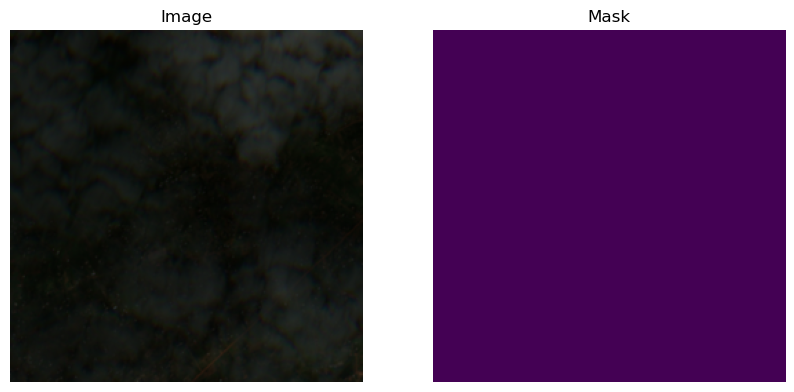

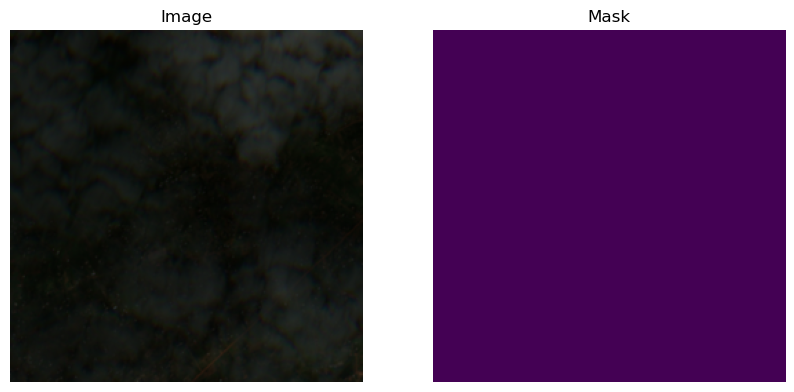

In [7]:
ds.plot(ds[100])

In [15]:
from torchgeo.datasets import TreeSatAI

ImportError: cannot import name 'TreeSatAI' from 'torchgeo.datasets' (/home/user/mambaforge/envs/env/lib/python3.11/site-packages/torchgeo/datasets/__init__.py)

In [14]:
!pip show torchgeo

Name: torchgeo
Version: 0.7.0.dev0
Summary: TorchGeo: datasets, samplers, transforms, and pre-trained models for geospatial data
Home-page: 
Author: 
Author-email: "Adam J. Stewart" <ajstewart426@gmail.com>
License: MIT License

Copyright (c) Microsoft Corporation.

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULA

In [1]:
# !pip uninstall torchgeo -y
!pip install git+https://github.com/microsoft/torchgeo.git

  Cloning https://github.com/microsoft/torchgeo.git to /tmp/pip-req-build-e0oafo3s
  Running command git clone --filter=blob:none --quiet https://github.com/microsoft/torchgeo.git /tmp/pip-req-build-e0oafo3s
  Resolved https://github.com/microsoft/torchgeo.git to commit 9bd14f84417000c041c9713dd632b57c88b6b899
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
from torchgeo import datasets
help(torchgeo.datasets)

NameError: name 'torchgeo' is not defined

In [3]:
# import torchgeo
print(getattr(torchgeo, "__version__", "No version found"))
torchgeo.datasets.treesatai

NameError: name 'torchgeo' is not defined

In [4]:
from torchgeo.datasets import TreeSatAI

data_root = '../data'
ds = TreeSatAI(root=data_root, download=True)
ds_test = TreeSatAI(root=data_root, download=True, split='test')

100%|██████████| 310M/310M [00:47<00:00, 6.58MB/s] 
 39%|███▉      | 333M/858M [00:28<00:45, 11.6MB/s] 


KeyboardInterrupt: 

In [15]:
ds[0].keys()

dict_keys(['label', 'image_aerial', 'image_s1', 'image_s2'])

In [26]:
ds[2000]['label'].shape

torch.Size([15])

In [8]:
from torchgeo.datasets import TreeSatAI

import tensorflow as tf
import tensorflow_datasets as tfds

class TreeSatAI(tfds.core.GeneratorBasedBuilder):
    VERSION = tfds.core.Version('0.0.1')

    def _split_generators(self, dl_manager):
        data_root = '../data'
        ds_train = TreeSatAI(root=data_root, split='train', sensors=('s1', 's2'), download=True)
        ds_test = TreeSatAI(root=data_root, split='test', sensors=('s1', 's2'), download=True)

        return {
            'train': self._generate_examples(ds_train),
            'test': self._generate_examples(ds_test)
        }

    def _generate_examples(dataset):
        for idx in range(0, len(dataset)):
            

            yield sample

In [2]:
from torchgeo.datasets import Substation

data_root = '/home/user/data/substations'
ds = Substation(
    root=data_root,
    download=True,
    mask_2d = False,
    num_of_timepoints = 1,
)

In [3]:
ds[0].keys()

dict_keys(['image', 'mask'])

In [4]:
import numpy as np
ds[0]['image'].shape

torch.Size([13, 228, 228])

In [98]:
import os
import pandas as pd

data_root = '/home/user/data/substations'
img_dir = os.path.join(data_root, 'image_stack')
mask_dir = os.path.join(data_root, 'mask')
img_fnames = pd.Series(sorted(os.listdir(image_dir)))

img_path = os.path.join(img_dir, img_fnames[0])
mask_path = os.path.join(mask_dir, img_fnames[0])
img = np.load(img_path)['arr_0']
mask = np.load(mask_path)['arr_0']
np.unique(mask)

mask.shape

(228, 228)

In [100]:
import tensorflow_datasets as tfds
from torchgeo.datasets import Substation as TorchgeoSubstation
import numpy as np
from collections import OrderedDict
import os
import pandas as pd

np.random.seed(77)

class Substation(tfds.core.GeneratorBasedBuilder):
    VERSION = tfds.core.Version('0.0.1')

    def _info(self):
        return tfds.core.DatasetInfo(
            builder=self,
            features=tfds.features.FeaturesDict({
                'input': tfds.features.Tensor(shape=(13, 228, 228), dtype=np.dtype("uint16"), encoding="zlib"),
                'label': tfds.features.Tensor(shape=(228, 228), dtype=np.dtype("uint16"), encoding="zlib"),
            }),
        )

    def _split_generators(self, dl_manager):
        data_root = '/home/user/data/substations'
        image_dir = os.path.join(data_root, 'image_stack')
        mask_dir = os.path.join(data_root, 'mask')
        image_fnames = pd.Series(sorted(os.listdir(image_dir)))

        train_end = int(len(image_fnames) * 0.8)
        val_end = int(len(image_fnames) * 0.9)

        train_fnames = image_fnames[:train_end]
        val_fnames = image_fnames[train_end:val_end]
        test_fnames = image_fnames[val_end:]

        return {
            'train': self._generate_examples(train_fnames, image_dir, mask_dir),
            'val': self._generate_examples(val_fnames, image_dir, mask_dir),
            'test': self._generate_examples(test_fnames, image_dir, mask_dir)
        }

    def _generate_examples(self, fnames, image_dir, mask_dir):
        for fname in fnames:
            img_path = os.path.join(image_dir, fname)
            mask_path = os.path.join(mask_dir, fname)

            # Load and preprocess image
            img = np.load(img_path)['arr_0']
            
            # Get single random image in time series
            T = img.shape[0]
            img = img[np.random.randint(T)]

            # Convert image to uint16
            img = img.astype(np.dtype("uint16"))
            
            # Load and preprocess mask
            mask = np.load(mask_path)['arr_0']
            mask[mask != 3] = 0
            mask[mask == 3] = 1
            mask = mask.astype(np.dtype("uint16"))

            yield fname, {'input': img, 'label': mask}

In [101]:
Substation().download_and_prepare()

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /home/user/tensorflow_datasets/substation/incomplete.HH6O4Y_0.0.1/substation-train.tfrecord*...:   0…

Generating val examples...: 0 examples [00:00, ? examples/s]

Shuffling /home/user/tensorflow_datasets/substation/incomplete.HH6O4Y_0.0.1/substation-val.tfrecord*...:   0%|…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /home/user/tensorflow_datasets/substation/incomplete.HH6O4Y_0.0.1/substation-test.tfrecord*...:   0%…

Dataset substation downloaded and prepared to /home/user/tensorflow_datasets/substation/0.0.1. Subsequent calls will reuse this data.


In [4]:
from torchgeo.datasets import SouthAfricaCropType

ImportError: cannot import name 'SouthAfricaCropType' from 'torchgeo.datasets' (/home/admin/anaconda3/envs/mmearth/lib/python3.9/site-packages/torchgeo/datasets/__init__.py)

In [3]:
SouthAfricaCropType()

NameError: name 'SouthAfricaCropType' is not defined